# Planar Maximally Filtered Graph (PMFG)

### Import requirements: planarity and networkx

In [1]:
import time
import planarity
import networkx as nx

### define the function to compute PMFG
#### Firstly, we need to sort the graph with respect to weights in descending order

In [2]:
def sort_graph_edges(G):
    sorted_edges = []
    for source, dest, data in sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = True): # in descending order!
        sorted_edges.append({'source': source,
                             'dest': dest,
                             'weight': data['weight']})
    return sorted_edges

#### the main function to compute PMFG. FIrstly, we sort the graph edges then add edges in descending order and check if the PMFG is planar. if not, we get rid of the edge from the PMFG

In [3]:
def compute_PMFG(G):
    PMFG = nx.Graph() # initialize
    ne_total = G.number_of_edges()
    nb_nodes = len(G.nodes)
    ne_pmfg = 3*(nb_nodes-2)
    sorted_edges = sort_graph_edges(G)
    t0 = time.time()
    for i, edge in enumerate(sorted_edges):
        PMFG.add_edge(edge['source'], edge['dest'], weight = edge['weight'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
        ne = PMFG.number_of_edges()
        print("Generating PMFG... added edges in PMFG %d/%d (%.2f%%) lookup edges in G %d/%d (%.2f%%) Elapsed TIme %.2f [sec]"\
            %(ne, ne_pmfg, (ne/ne_pmfg)*100, i, ne_total, (i+1/ne_total)*100, time.time()-t0), end="\r")
        if ne == ne_pmfg:
            break
    return PMFG

## Example of generating PMFG

In [4]:
G = nx.random_geometric_graph(200,0.3)
import random
for (u,v,w) in G.edges(data=True):
    G.edges[u,v]['weight'] = random.randint(1,10) # assign random weighted edge

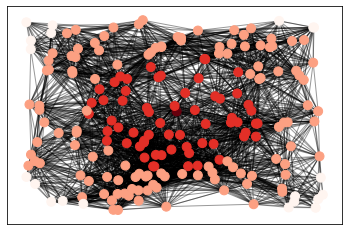

In [5]:
%matplotlib inline
import matplotlib as plt

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
pos = nx.get_node_attributes(G, "pos")
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

p = dict(nx.single_source_shortest_path_length(G, ncenter))

nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

In [6]:
PMFG = compute_PMFG(G)

Generating PMFG... added edges in PMFG 338/594 (56.90%) lookup edges in G 833/4365 (83300.02%) Elapsed TIme 0.23 [sec]

Generating PMFG... added edges in PMFG 404/594 (68.01%) lookup edges in G 1491/4365 (149100.02%) Elapsed TIme 0.45 [sec]

Generating PMFG... added edges in PMFG 455/594 (76.60%) lookup edges in G 2161/4365 (216100.02%) Elapsed TIme 0.68 [sec]

Generating PMFG... added edges in PMFG 527/594 (88.72%) lookup edges in G 3470/4365 (347000.02%) Elapsed TIme 1.13 [sec]

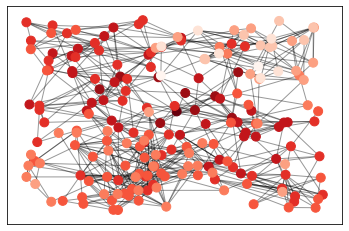

In [7]:
# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

p = dict(nx.single_source_shortest_path_length(PMFG, ncenter))

nx.draw_networkx_edges(PMFG, pos, alpha=0.4)
nx.draw_networkx_nodes(
    PMFG,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)